# Task 1 - 4 link bar to rotate piece

After smalle googling I have found this [idea](https://www.youtube.com/watch?v=KCJa2zRWpwg) and aim to implement it for this task.

As I see the only thing I have to adapt is the sizes. They do not match the ones I have in task for sure.


In [1]:
import casadi as cs

opti = cs.Opti()

# array of lengths
lengths = opti.variable(4)

# desired time for rotation
T = 2

# number of measurements
N = 360

# array of angles
angles = opti.variable(3, N)

# first joint should rotate constantly
# for iter in range(1, N):
#     opti.subject_to(angles[0, iter] == angles[0, iter - 1] + 2 * cs.pi / N)


class ThreeLink:
    @staticmethod
    def p1(p0, lengths, angles):
        return p0 + lengths[0] * cs.vertcat(cs.cos(angles[0]).T, cs.sin(angles[0]).T)

    @staticmethod
    def p2(p1, lengths, angles):
        q2 = angles[0] + angles[1]
        return p1 + lengths[1] * cs.vertcat(cs.cos(q2).T, cs.sin(q2).T)

    @staticmethod
    def p3(p2, lengths, angles):
        q3 = angles[0] + angles[1] + angles[2]
        return p2 + lengths[2] * cs.vertcat(cs.cos(q3).T, cs.sin(q3).T)

    @staticmethod
    def p4(p3, lengths, angles):
        q3 = angles[0] + angles[1] + angles[2]
        return p3 + lengths[3] * cs.vertcat(cs.cos(q3).T, cs.sin(q3).T)

    @staticmethod
    def fk(p0, lengths, angles):
        p1 = ThreeLink.p1(p0, lengths, angles)
        p2 = ThreeLink.p2(p1, lengths, angles)
        p3 = ThreeLink.p3(p2, lengths, angles)
        p4 = ThreeLink.p4(p3, lengths, angles)
        return p1, p2, p3, p4


# initial position for points
p0 = cs.vertcat(0, 0)
p3 = cs.vertcat(2, 1)

# p4 should be on the circle of radius 1 around p3 through the time

cost = 0

# point 3 should remain static
for iter in range(N):
    # forward kinematics
    iter_p1 = ThreeLink.p1(p0, lengths, angles[:, iter])
    iter_p2 = ThreeLink.p2(iter_p1, lengths, angles[:, iter])
    iter_p3 = ThreeLink.p3(iter_p2, lengths, angles[:, iter])
    iter_p4 = ThreeLink.p4(iter_p3, lengths, angles[:, iter])

    opti.subject_to(iter_p3 == p3)
    opti.subject_to(cs.sumsqr(iter_p4 - iter_p3) == 1)

    # # minimize the velocity in joints
    # if iter == 0:
    #     continue
    # v2 = cs.sumsqr(angles[1, iter] - angles[1, iter - 1])
    # v3 = cs.sumsqr(angles[2, iter] - angles[2, iter - 1])

    # cost += 10 * 4 * v2 + 10**4 * v3


# constraints
opti.subject_to(lengths >= 0)
# all angles between -2pi and 2pi
opti.subject_to(opti.bounded(-2 * cs.pi, angles[:, 0], 2 * cs.pi))
opti.subject_to(opti.bounded(-2 * cs.pi, angles[:, 1], 2 * cs.pi))

# at moment T = 0, p4 should have angle more than pi / 3
opti.subject_to(angles[0, 0] + angles[1, 0] + angles[2, 0] >= cs.pi / 3)

# at moment T = half, p4 should be below the y=1 line
_, _, _, p4 = ThreeLink.fk(p0, lengths, angles[:, int(N / 2)])
opti.subject_to(p4[1] <= 1)

opti.minimize(cost)
# solve
opti.solver("ipopt")

sol = opti.solve()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     5760
Number of nonzeros in inequality constraint Jacobian.:       20
Number of nonzeros in Lagrangian Hessian.............:     5401

MUMPS returned INFO(1) = -9 and requires more memory, reallocating.  Attempt 1
  Increasing icntl[13] from 1000 to 2000.
MUMPS returned INFO(1) = -9 and requires more memory, reallocating.  Attempt 2
  Increasing icntl[13] from 2000 to 4000.
MUMPS returned INFO(1) = -9 and requires more memory, reallocating.  Attempt 3
  Increasing icntl[13] from

In [2]:
opti.value(lengths)

array([1.35703199, 0.78024611, 0.12818827, 1.        ])

In [3]:
import numpy as np

ThreeLink.fk(np.array([0, 0]), np.array([1, 1, 1, 1]), np.array([[0, 0, 0], [1, 2, 3]]).T)

(DM(
 [[1, 0.540302], 
  [0, 0.841471]]),
 DM(
 [[2, -0.44969], 
  [0, 0.982591]]),
 DM(
 [[3, 0.51048], 
  [0, 0.703175]]),
 DM(
 [[4, 1.47065], 
  [0, 0.42376]]))

In [4]:
ThreeLink.fk(np.array([0, 0]), sol.value(lengths), sol.value(angles))

(DM(
 [[1.2542, 1.27553, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.28029, 1.2

In [6]:
angles = sol.value(angles).T
lengths = sol.value(lengths)

import numpy as np

points = np.zeros((N, 4, 2))
points[:, 0, :] = np.array([0, 0])
points[:, 1, :] = (
    points[:, 0, :]
    + np.array([lengths[0] * np.cos(angles[:, 0]), lengths[0] * np.sin(angles[:, 0])]).T
)
points[:, 2, :] = (
    points[:, 1, :]
    + np.array([lengths[1] * np.cos(angles[:, 0] + angles[:, 1]), lengths[1] * np.sin(angles[:, 0] + angles[:, 1])]).T
)
points[:, 3, :] = (
    points[:, 2, :]
    + np.array([lengths[2] * np.cos(angles[:, 0] + angles[:, 1] + angles[:, 2]), lengths[2] * np.sin(angles[:, 0] + angles[:, 1] + angles[:, 2])]).T
)


In [7]:
lengths

array([1.35703199, 0.78024611, 0.12818827, 1.        ])

In [8]:
# substitute the lengths into mujoco scene


def mujoco_scene(lengths):
    l1 = lengths[0]
    l2 = lengths[1]
    l3 = lengths[2]
    return f"""
    <mujoco model="task1">
    <compiler angle="radian" autolimits="true"/>

    <statistic center="0 1.5 0.3" extent="2"/>

    <visual>
        <headlight diffuse="0.6 0.6 0.6" ambient="0.1 0.1 0.1" specular="0 0 0"/>
        <rgba haze="0.15 0.25 0.35 1"/>
        <global azimuth="-90" elevation="-20"/>
    </visual>

    <default>
        <default class="visual">
        <geom density="0" contype="0" conaffinity="0" group="1" rgba="0.15 0.15 0.15 1"/>
        </default>
    </default>

    <asset>
        <texture type="skybox" builtin="gradient" rgb1="0.3 0.5 0.7" rgb2="0 0 0" width="512" height="3072"/>
        <texture type="2d" name="groundplane" builtin="checker" mark="edge" rgb1="0.2 0.3 0.4" rgb2="0.1 0.2 0.3"
        markrgb="0.8 0.8 0.8" width="300" height="300"/>
        <material name="groundplane" texture="groundplane" texuniform="true" texrepeat="5 5" reflectance="0.2"/>
    </asset>

    <worldbody>
        <light pos="0 0 1.5" dir="0 0 -1" directional="true"/>
        <geom name="floor" pos="0 0 -2" size="0 0 0.05" type="plane" material="groundplane"/>
        <body name="link1" pos="0 0 0">
            <inertial pos="0 0 0" mass="1" diaginertia="1 1 1"/>
            <joint name="joint1" pos="-{l1/2} 0 0" axis="0 1 0"/>
            <geom class="visual" size="{l1/2} 0.025 0.025" pos="0 0 0" type="box"/>
            <body name="link2" pos="{l1/2 + l2/2} 0 0">
                <inertial pos="0 0 0" mass="1" diaginertia="1 1 1"/>
                <joint name="joint2" pos="-{l2/2} 0 0" axis="0 1 0"/>
                <geom class="visual" size="{l2/2} 0.025 0.025" pos="0 0 0" type="box"/>
                <body name="link3" pos="{l2/2 + l3/2} 0 0">
                    <inertial pos="0 0 0" mass="1" diaginertia="1 1 1"/>
                    <joint name="joint3" pos="-{l3/2} 0 0" axis="0 1 0"/>
                    <geom class="visual" size="{l3/2} 0.025 0.025" pos="0 0 0" type="box"/>
                </body>
            </body>
        </body>
    </worldbody>

    </mujoco>
    """

In [54]:
import mujoco
import mediapy as media

model = mujoco.MjModel.from_xml_string(mujoco_scene(lengths))
data = mujoco.MjData(model)

try:
    renderer
except:
    renderer = mujoco.Renderer(model)



""

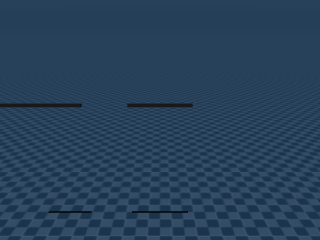

In [55]:
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

In [56]:
duration = 10  # (seconds)
framerate = 30  # (Hz)

n_steps = N

# Simulate and display video.
frames = []
mujoco.mj_resetData(model, data)  # Reset state and time.

for iteration in range(n_steps):
    data.qpos[:] = angles[iteration, :]

    mujoco.mj_forward(model, data)

    renderer.update_scene(data)
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=framerate)

In [10]:
points.shape

(360, 4, 2)

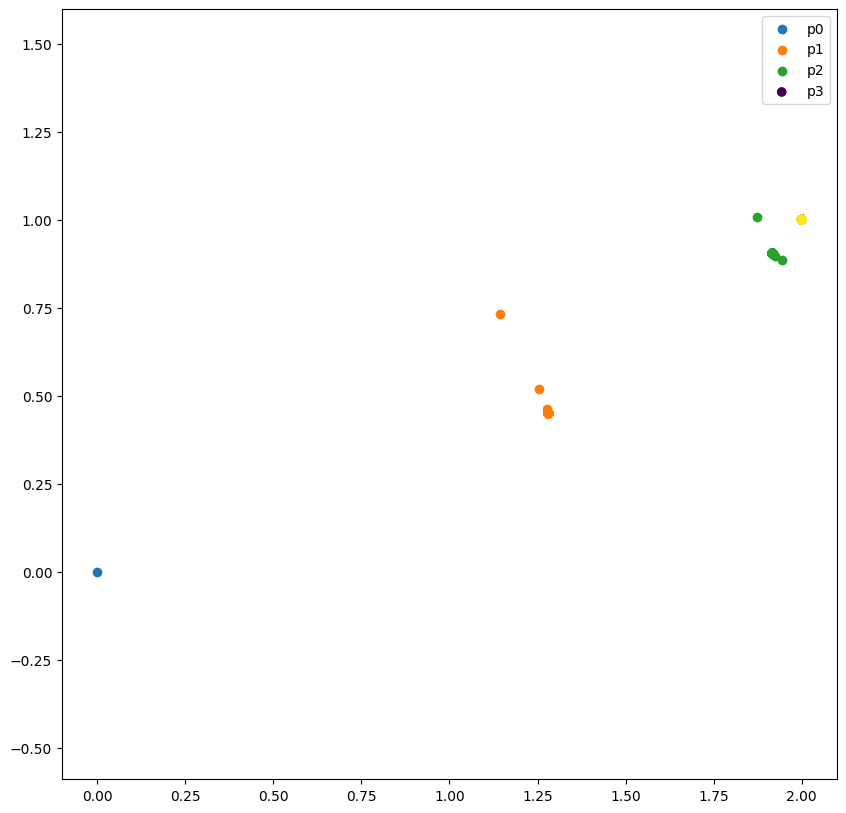

In [9]:
# scatter iteration
iteration = 0

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.scatter(points[iteration, 0, 0], points[iteration, 0, 1], label="p0")
plt.scatter(points[:, 1, 0], points[:, 1, 1], label="p1") #, cmap="viridis", c=range(N))
plt.scatter(points[:, 2, 0], points[:, 2, 1], label="p2") #, cmap="viridis", c=range(N))
plt.scatter(points[:, 3, 0], points[:, 3, 1], label="p3", cmap="viridis", c=range(N))
plt.axis("equal")

plt.legend()